In [1]:
import pandas as pd

import sys
sys.path.append('../')

from exp.features import Features

In [25]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [26]:
train.shape

(27532, 16)

In [27]:
test.shape

(27537, 15)

In [47]:
train_combinations_with_price = {}
for _, row in train.iterrows():
    key = tuple(row[['year', 'manufacturer', 'type', 'fuel', 'title_status', 'transmission', "condition", "size", "cylinders", "drive", "paint_color", "state"]])
    if key in train_combinations_with_price:
        train_combinations_with_price[key].append((row["odometer"],row["price"]))
    else:
        train_combinations_with_price[key] = []

#lenでソート
train_combinations_with_price = sorted(train_combinations_with_price.items(), key=lambda x: len(x[1]), reverse=True)

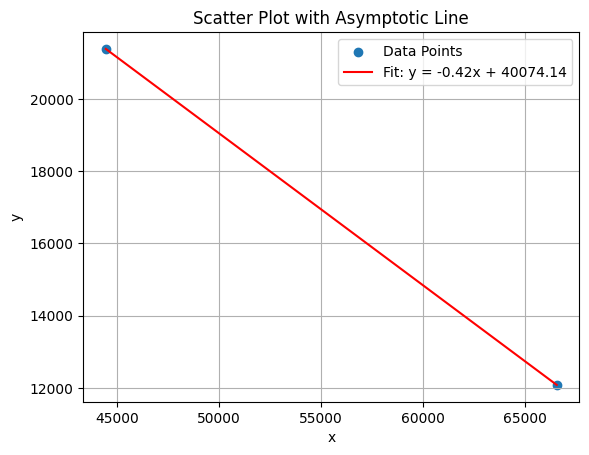

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_data, y_data = zip(*train_combinations_with_price[1][1])
x_data = np.array(x_data)
y_data = np.array(y_data)

def linear_model(x, m, b):
    return m * x + b

params, covariance = curve_fit(linear_model, x_data, y_data)
m, b = params

plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, linear_model(x_data, m, b), color='red', label=f'Fit: y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Asymptotic Line')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
for _, row in test.iterrows():
    key = tuple(row[["year", 'manufacturer', 'type', 'fuel', 'title_status', 'transmission', "condition", "size", "cylinders", "drive", "paint_color", "odometer"]])
    if key in train_combinations_with_price:
        print(key, train_combinations_with_price[key])

In [30]:
# trainの組み合わせをセットとして保持
train_combinations = set(map(tuple, train[['year', 'manufacturer', 'type', 'fuel', 'title_status', 'transmission', "condition", "size", "cylinders", "drive", "paint_color"]].values))

# testの組み合わせとtrainの組み合わせを比較
duplicates_in_train = test[test[['year', 'manufacturer', 'type', 'fuel', 'title_status', 'transmission', "condition", "size", "cylinders", "drive", "paint_color"]].apply(tuple, axis=1).isin(train_combinations)]

In [31]:
duplicates_in_train

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
10,27542,sarasota-bradenton,2012,nissan,excellent,4 cylinders,gas,100173,clean,automatic,fwd,full-size,sedan,silver,fl
19,27551,charlotte,2013,chevrolet,excellent,4 cylinders,gas,105704,clean,automatic,fwd,compact,sedan,black,nc
21,27553,nashville,2012,ford,excellent,4 cylinders,gas,134537,clean,automatic,fwd,mid-size,sedan,white,tn
22,27554,north jersey,2012,bmw,excellent,6 cylinders,gas,104123,clean,automatic,4wd,mid-size,sedan,black,nj
25,27557,detroit metro,2015,kia,like new,4 cylinders,gas,38260,clean,automatic,fwd,compact,sedan,black,mi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27499,55031,rhode island,2014,BMW,excellent,6 cylinders,gas,110393,clean,automatic,4wd,mid-size,SUV,black,ri
27500,55032,greenville / upstate,2016,ram,excellent,6 cylinders,diesel,156859,clean,automatic,4wd,full-size,truck,blue,sc
27519,55051,east idaho,2011,ram,excellent,8 cylinders,diesel,110762,clean,automatic,4wd,full-size,truck,black,id
27523,55055,detroit metro,2012,nissan,like new,4 cylinders,gas,87552,clean,automatic,fwd,compact,sedan,black,mi
